# Day 2 - NYC School directory

#### ✅ Instructions
1. Download the dataset from the day_2_datasets folder.

2. Open a new Jupyter Notebook and:

    - Load the dataset using pandas
    - Clean the column names (make lowercase, replace spaces with _, remove special characters)

3. Filter the dataset to include only schools located in **Brooklyn**

4. Answer the following:

    - How many total schools are in Brooklyn? (use the method that counts only unique values. Also there is a column that has a unique identifier for schools.)
    - How many schools in Brooklyn offer Grade 9 entry? (here you need to use range to get the correct answer for example just stating min_grade entry >=9 will miss the schools that offer earlier entry)

5. Group and summarize:

    - Count of schools per **borough** (again unique schools)
    - Average number of students per **borough**
    - Summary of grade_span_max grouped by **borough** (use the method that provides you with basic statistics about that column)

6. Create visualizations:

    - Bar chart: Number of schools per **borough**

7. **Write 2–3 key insights** based on your findings at the end of the notebook

### Imports

In [2]:
import pandas as pd
import os
import matplotlib.pyplot as plt

### 2.1. Load Dataset 

In [3]:
os.chdir(os.path.join(os.path.expanduser("~"), "Downloads"))

In [5]:
df = pd.read_csv("high-school-directory.csv")
df.head()

,dbn,school_name,borough,building_code,phone_number,fax_number,grade_span_min,grade_span_max,expgrade_span_min,expgrade_span_max,...,Council District,Census Tract,BIN,BBL,NTA,Zip Codes,Community Districts,Borough Boundaries,City Council Districts,Police Precincts
0,27Q260,Frederick Douglass Academy VI High School,Queens,Q465,718-471-2154,718-471-2890,9.0,12,NaN,NaN,...,31.0,100802.0,4300730.0,4.157360e+09,Far Rockaway-Bayswater ...,20529.0,51,3,47,59
1,21K559,Life Academy High School for Film and Music,Brooklyn,K400,718-333-7750,718-333-7775,9.0,12,NaN,NaN,...,47.0,306.0,3186454.0,3.068830e+09,Gravesend ...,17616.0,21,2,45,35
2,16K393,Frederick Douglass Academy IV Secondary School,Brooklyn,K026,718-574-2820,718-574-2821,9.0,12,NaN,NaN,...,36.0,291.0,3393805.0,3.016160e+09,Stuyvesant Heights ...,18181.0,69,2,49,52
3,08X305,Pablo Neruda Academy,Bronx,X450,718-824-1682,718-824-1663,9.0,12,NaN,NaN,...,18.0,16.0,2022205.0,2.036040e+09,Soundview-Castle Hill-Clason Point-Harding Par...,11611.0,58,5,31,26
4,03M485,Fiorello H. LaGuardia High School of Music & A...,Manhattan,M485,212-496-0700,212-724-5748,9.0,12,NaN,NaN,...,6.0,151.0,1030341.0,1.011560e+09,Lincoln Square ...,12420.0,20,4,19,12


### 2.2. Clean Column Names

- make lowercase
- replace spaces with _
- remove special characters


$\red{\rightarrow}$ Column names were already clean. 

In [14]:
# Clean column names
df.columns = (
    df.columns
    .str.lower()
    .str.strip()
    .str.replace(" ", "_")
    .str.replace("[^a-z0-9_]", "", regex=True)
)

### 3. Filter Dataset

- Only include schools located in Brooklyn.

In [15]:
df_brooklyn = df[df['borough'] == 'Brooklyn']
df_brooklyn.shape

(121, 69)

In [9]:
df_brooklyn.head()

,dbn,school_name,borough,building_code,phone_number,fax_number,grade_span_min,grade_span_max,expgrade_span_min,expgrade_span_max,...,council_district,census_tract,bin,bbl,nta,zip_codes,community_districts,borough_boundaries,city_council_districts,police_precincts
1,21K559,Life Academy High School for Film and Music,Brooklyn,K400,718-333-7750,718-333-7775,9.0,12,NaN,NaN,...,47.0,306.0,3186454.0,3.068830e+09,Gravesend ...,17616.0,21,2,45,35
2,16K393,Frederick Douglass Academy IV Secondary School,Brooklyn,K026,718-574-2820,718-574-2821,9.0,12,NaN,NaN,...,36.0,291.0,3393805.0,3.016160e+09,Stuyvesant Heights ...,18181.0,69,2,49,52
7,17K122,Pathways in Technology Early College High Scho...,Brooklyn,K625,718-221-1593,718-221-1781,9.0,12,9.0,14.0,...,36.0,311.0,3030553.0,3.012160e+09,Crown Heights North ...,17615.0,16,2,49,49
10,23K644,Eagle Academy for Young Men II,Brooklyn,K271,718-495-0863,718-732-2129,6.0,12,NaN,NaN,...,41.0,301.0,3042157.0,3.015500e+09,Ocean Hill ...,13516.0,55,2,17,46
12,15K462,Secondary School for Law,Brooklyn,K460,718-832-4250,718-499-3947,9.0,12,NaN,NaN,...,39.0,155.0,3025510.0,3.010820e+09,Park Slope-Gowanus ...,17617.0,14,2,27,50


### 4. Answer the following:


- How many total schools are in Brooklyn? (use the method that counts only unique values. Also there is a column that has a unique identifier for schools.)

In [22]:
schools_unique = df_brooklyn["dbn"].nunique()
print("Brooklyn has", schools_unique, "unique schools.")

Brooklyn has 121 unique schools.


- How many schools in Brooklyn offer Grade 9 entry? (here you need to use range to get the correct answer for example just stating min_grade entry >=9 will miss the schools that offer earlier entry)

In [18]:
df_brooklyn["grade_span_min"].value_counts()

grade_span_min
9.0    98
6.0    23
Name: count, dtype: int64

In [19]:
df_brooklyn["grade_span_max"].value_counts()

grade_span_max
12    117
10      2
9       1
11      1
Name: count, dtype: int64

In [ ]:
# Filter Brooklyn schools that include grade 9 within their grade range
brooklyn_grade9 = df_brooklyn[
    (df_brooklyn['grade_span_min'].le(9)) &   # grade_span_min <= 9
    (df_brooklyn['grade_span_max'].ge(9))     # grade_span_max >= 9
]

schools_grade9 = brooklyn_grade9['dbn'].nunique()
print("Schools in Brooklyn offering Grade 9:", schools_grade9)

Schools in Brooklyn offering Grade 9: 121


### 5. Group and summarize:

- Count of schools per **borough** (again unique schools)


In [40]:
df_schools_per_borough = (
    df.groupby('borough')['dbn']
    .nunique()
    .reset_index()
    .sort_values(by='dbn', ascending=False)
)

df_schools_per_borough

,borough,dbn
1,Brooklyn,121
0,Bronx,118
2,Manhattan,106
3,Queens,80
4,Staten Island,10


 - Average number of students per **borough**

In [ ]:
df_avg_students = (
    df.groupby('borough')['total_students']
    .mean()
    .reset_index()
    .sort_values(by='total_students', ascending=False)
    .round(2)
)
df_avg_students

,borough,total_students
4,Staten Island,1847.50
3,Queens,1046.64
1,Brooklyn,699.13
2,Manhattan,589.83
0,Bronx,490.41


- Summary of grade_span_max grouped by **borough** (use the method that provides you with basic statistics about that column)

In [44]:
summary_grade_span = (
    df.groupby('borough')['grade_span_max']
    .describe()
)
summary_grade_span

,count,mean,std,min,25%,50%,75%,max
borough,,,,,,,,
Bronx,118.0,11.906780,0.369506,9.0,12.0,12.0,12.0,12.0
Brooklyn,121.0,11.933884,0.381566,9.0,12.0,12.0,12.0,12.0
Manhattan,106.0,11.877358,0.472135,9.0,12.0,12.0,12.0,12.0
Queens,80.0,11.825000,0.497462,10.0,12.0,12.0,12.0,12.0
Staten Island,10.0,12.000000,0.000000,12.0,12.0,12.0,12.0,12.0


### 6. Create visualizations:

- Bar chart: Number of schools per **borough**

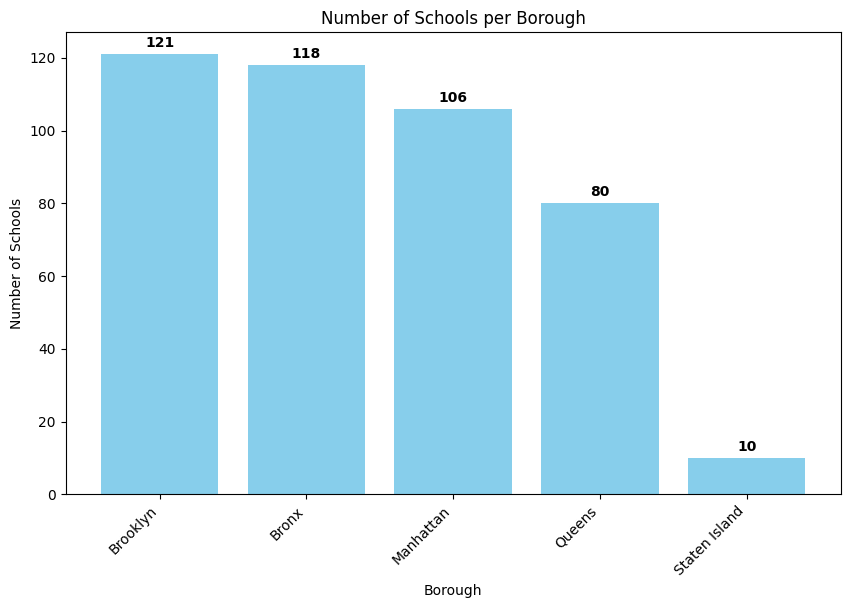

In [48]:
plt.figure(figsize=(10, 6))
plt.bar(df_schools_per_borough['borough'], df_schools_per_borough['dbn'], color='skyblue')

plt.title("Number of Schools per Borough")
plt.xlabel("Borough")
plt.ylabel("Number of Schools")
plt.xticks(rotation=45, ha='right') 

for i, v in enumerate(df_schools_per_borough['dbn']):
    plt.text(i, v + 2, str(v), ha='center', fontweight='bold') #show values on top of bars

plt.show()

### 7. Insights 

**Write 2–3 key insights** based on your findings at the end of the notebook

- Staten Island has the highest average number of students (1,847.5), even though it only has 10 schools.
- The Bronx has the second-highest number of schools (118) but the lowest average number of students (490.4).